# Imports

In [295]:
train_url = 'https://raw.githubusercontent.com/sidt-ai/data-science-competitions/main/hackerearth/amexpert_codelab/data/raw/train.csv'
test_url = 'https://raw.githubusercontent.com/sidt-ai/data-science-competitions/main/hackerearth/amexpert_codelab/data/raw/test.csv'
sub_url = 'https://raw.githubusercontent.com/sidt-ai/data-science-competitions/main/hackerearth/amexpert_codelab/data/raw/sample_submission.csv'

In [296]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Data overview

In [297]:
train = pd.read_csv(train_url)
test = pd.read_csv(test_url)
submission = pd.read_csv(sub_url)

In [298]:
train.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,ita Bose,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,CST_121920,Alper Jonathan,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,CST_109330,Umesh Desai,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,CST_128288,Rie,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,CST_151355,McCool,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0


In [299]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45528 entries, 0 to 45527
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              45528 non-null  object 
 1   name                     45528 non-null  object 
 2   age                      45528 non-null  int64  
 3   gender                   45528 non-null  object 
 4   owns_car                 44981 non-null  object 
 5   owns_house               45528 non-null  object 
 6   no_of_children           44754 non-null  float64
 7   net_yearly_income        45528 non-null  float64
 8   no_of_days_employed      45065 non-null  float64
 9   occupation_type          45528 non-null  object 
 10  total_family_members     45445 non-null  float64
 11  migrant_worker           45441 non-null  float64
 12  yearly_debt_payments     45433 non-null  float64
 13  credit_limit             45528 non-null  float64
 14  credit_limit_used(%)  

In [300]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11383 entries, 0 to 11382
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              11383 non-null  object 
 1   name                     11383 non-null  object 
 2   age                      11383 non-null  int64  
 3   gender                   11383 non-null  object 
 4   owns_car                 11251 non-null  object 
 5   owns_house               11383 non-null  object 
 6   no_of_children           11193 non-null  float64
 7   net_yearly_income        11383 non-null  float64
 8   no_of_days_employed      11278 non-null  float64
 9   occupation_type          11383 non-null  object 
 10  total_family_members     11352 non-null  float64
 11  migrant_worker           11357 non-null  float64
 12  yearly_debt_payments     11361 non-null  float64
 13  credit_limit             11383 non-null  float64
 14  credit_limit_used(%)  

# Categorical features

In [301]:
cat_features = ['gender', 'owns_car', 'owns_house', 'occupation_type', 'migrant_worker', 'default_in_last_6months']

### gender

In [302]:
train.gender.nunique(), test.gender.nunique()

(3, 3)

In [303]:
train.gender.unique(), test.gender.unique()

(array(['F', 'M', 'XNA'], dtype=object),
 array(['F', 'M', 'XNA'], dtype=object))

In [304]:
train.gender.value_counts()

F      29957
M      15570
XNA        1
Name: gender, dtype: int64

In [305]:
test.gender.value_counts()

F      7443
M      3939
XNA       1
Name: gender, dtype: int64

In [306]:
train['gender'] = train.gender.astype('category').cat.codes
test['gender'] = test.gender.astype('category').cat.codes

### owns_car

In [307]:
train.owns_car.nunique(), test.owns_car.nunique()

(2, 2)

In [308]:
train.owns_car.unique(), test.owns_car.unique()

(array(['N', 'Y', nan], dtype=object), array(['Y', 'N', nan], dtype=object))

In [309]:
train.owns_car.isna().sum(), test.owns_car.isna().sum()

(547, 132)

We can consider missing entries as not having a car.

In [310]:
train.owns_car.fillna('N', inplace=True)
test.owns_car.fillna('N', inplace=True)

In [311]:
train.owns_car.value_counts()

N    30290
Y    15238
Name: owns_car, dtype: int64

In [312]:
test.owns_car.value_counts()

N    7504
Y    3879
Name: owns_car, dtype: int64

In [313]:
train['owns_car'] = train.owns_car.astype('category').cat.codes
test['owns_car'] = test.owns_car.astype('category').cat.codes

### owns_house

In [314]:
train.owns_house.nunique(), test.owns_house.nunique()

(2, 2)

In [315]:
train.owns_house.unique(), test.owns_house.unique()

(array(['Y', 'N'], dtype=object), array(['N', 'Y'], dtype=object))

In [316]:
train.owns_house.value_counts()

Y    31642
N    13886
Name: owns_house, dtype: int64

In [317]:
test.owns_house.value_counts()

Y    7861
N    3522
Name: owns_house, dtype: int64

In [318]:
train['owns_house'] = train.owns_house.astype('category').cat.codes
test['owns_house'] = test.owns_house.astype('category').cat.codes

### occupation_type

In [319]:
train.occupation_type.nunique(), test.occupation_type.nunique()

(19, 19)

In [320]:
train.occupation_type.unique()

array(['Unknown', 'Laborers', 'Core staff', 'Accountants',
       'High skill tech staff', 'Sales staff', 'Managers', 'Drivers',
       'Medicine staff', 'Cleaning staff', 'HR staff', 'Security staff',
       'Cooking staff', 'Waiters/barmen staff', 'Low-skill Laborers',
       'Private service staff', 'Secretaries', 'Realty agents',
       'IT staff'], dtype=object)

Checking for unseen values in test set.

In [321]:
set(test.occupation_type.unique()) - set(train.occupation_type.unique())

set()

In [322]:
train.occupation_type.value_counts()

Unknown                  14299
Laborers                  8134
Sales staff               4725
Core staff                4062
Managers                  3168
Drivers                   2747
High skill tech staff     1682
Accountants               1474
Medicine staff            1275
Security staff            1025
Cooking staff              902
Cleaning staff             665
Private service staff      387
Low-skill Laborers         336
Waiters/barmen staff       203
Secretaries                199
Realty agents              101
HR staff                    78
IT staff                    66
Name: occupation_type, dtype: int64

In [323]:
test.occupation_type.value_counts()

Unknown                  3546
Laborers                 2071
Sales staff              1176
Core staff               1018
Managers                  806
Drivers                   703
High skill tech staff     405
Accountants               365
Medicine staff            318
Security staff            252
Cooking staff             208
Cleaning staff            164
Private service staff     109
Low-skill Laborers         61
Waiters/barmen staff       47
Secretaries                42
Realty agents              33
HR staff                   31
IT staff                   28
Name: occupation_type, dtype: int64

Occupation would be a good indicator of financial condition but a large number of rows have 'Unknown' occupation type which is equivalent to a missing value.  
We can inspect the occupation types with respect to approximate wage ranges.

In [324]:
train.groupby('occupation_type')['net_yearly_income'].mean()

occupation_type
Accountants              227558.220685
Cleaning staff           153311.125910
Cooking staff            161399.980067
Core staff               201782.150532
Drivers                  220685.711882
HR staff                 207091.117179
High skill tech staff    215390.740898
IT staff                 257120.273788
Laborers                 209513.962160
Low-skill Laborers       156102.234732
Managers                 310594.313352
Medicine staff           174967.629867
Private service staff    201407.135323
Realty agents            233897.464950
Sales staff              180052.438874
Secretaries              188785.666281
Security staff           176878.204761
Unknown                  179121.539234
Waiters/barmen staff     172876.091034
Name: net_yearly_income, dtype: float64

In [325]:
train.groupby('occupation_type')['net_yearly_income'].median()

occupation_type
Accountants              200804.385
Cleaning staff           142812.510
Cooking staff            145715.030
Core staff               175860.180
Drivers                  201726.440
HR staff                 174600.950
High skill tech staff    194482.880
IT staff                 218547.855
Laborers                 173820.165
Low-skill Laborers       144495.020
Managers                 264515.505
Medicine staff           156995.880
Private service staff    186662.010
Realty agents            219751.400
Sales staff              160891.200
Secretaries              157299.680
Security staff           161410.230
Unknown                  155722.200
Waiters/barmen staff     162132.290
Name: net_yearly_income, dtype: float64

In [326]:
train.groupby('occupation_type')['net_yearly_income'].max()

occupation_type
Accountants              1.741728e+06
Cleaning staff           5.699828e+05
Cooking staff            5.730429e+05
Core staff               9.715007e+05
Drivers                  1.094072e+06
HR staff                 7.483401e+05
High skill tech staff    1.051419e+06
IT staff                 7.729470e+05
Laborers                 1.407590e+08
Low-skill Laborers       3.905110e+05
Managers                 4.193102e+06
Medicine staff           8.787693e+05
Private service staff    7.134551e+05
Realty agents            7.641776e+05
Sales staff              1.208733e+06
Secretaries              2.217661e+06
Security staff           7.211469e+05
Unknown                  4.433825e+06
Waiters/barmen staff     4.405347e+05
Name: net_yearly_income, dtype: float64

The mean and median incomes of the different occupation types do not exactly conform with real-world wage differences. For instance, 'High skill tech staff' (around 190K USD) would not have lesser income than 'Drivers' (around 200K USD). The mean could be higher because of outliers but the median shows the same trend.  
Thus, we have to consider removing either *occupation_type* or *net_yearly_income* as they tell contrasting stories.

In [327]:
train['occupation_type'] = train.occupation_type.astype('category').cat.codes
test['occupation_type'] = test.occupation_type.astype('category').cat.codes

### migrant_worker

In [328]:
train.migrant_worker.nunique(), test.migrant_worker.nunique()

(2, 2)

In [329]:
train.migrant_worker.unique(), test.migrant_worker.unique()

(array([ 1.,  0., nan]), array([ 0.,  1., nan]))

1->yes, 0->no

In [330]:
train.migrant_worker.isna().sum(), test.migrant_worker.isna().sum()

(87, 26)

In [331]:
train.migrant_worker.value_counts()

0.0    37302
1.0     8139
Name: migrant_worker, dtype: int64

We will consider missing values as not a migrant worker.

In [332]:
train.migrant_worker.fillna(0, inplace=True)
test.migrant_worker.fillna(0, inplace=True)

In [333]:
train['migrant_worker'] = train.migrant_worker.astype('int8')
test['migrant_worker'] = test.migrant_worker.astype('int8')

### default_in_last_6months

In [334]:
train.default_in_last_6months.nunique(), test.default_in_last_6months.nunique()

(2, 2)

In [335]:
train.default_in_last_6months.unique(), test.default_in_last_6months.unique()

(array([1, 0]), array([0, 1]))

1->yes, 0->no

In [336]:
train.default_in_last_6months.value_counts()

0    43227
1     2301
Name: default_in_last_6months, dtype: int64

In [337]:
test.default_in_last_6months.value_counts()

0    10829
1      554
Name: default_in_last_6months, dtype: int64

In [338]:
train['default_in_last_6months'] = train.default_in_last_6months.astype('int8')
test['default_in_last_6months'] = test.default_in_last_6months.astype('int8')

### Processed categorical features

In [339]:
train[cat_features].head()

,gender,owns_car,owns_house,occupation_type,migrant_worker,default_in_last_6months
0,0,0,1,17,1,1
1,1,0,1,8,0,0
2,1,0,1,8,0,0
3,0,0,1,3,0,0
4,1,1,1,3,0,0


In [340]:
train[cat_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45528 entries, 0 to 45527
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   gender                   45528 non-null  int8 
 1   owns_car                 45528 non-null  int8 
 2   owns_house               45528 non-null  int8 
 3   occupation_type          45528 non-null  int8 
 4   migrant_worker           45528 non-null  int8 
 5   default_in_last_6months  45528 non-null  int8 
dtypes: int8(6)
memory usage: 266.9 KB


In [341]:
train[cat_features + ['credit_card_default']].corr()

,gender,owns_car,owns_house,occupation_type,migrant_worker,default_in_last_6months,credit_card_default
gender,1.000000,0.342805,-0.041786,-0.129527,0.134868,0.045858,0.057544
owns_car,0.342805,1.000000,0.005821,-0.116833,0.094016,-0.015965,-0.017104
owns_house,-0.041786,0.005821,1.000000,0.035635,-0.025227,-0.002221,-0.002693
occupation_type,-0.129527,-0.116833,0.035635,1.000000,-0.111448,-0.011574,-0.021439
migrant_worker,0.134868,0.094016,-0.025227,-0.111448,1.000000,0.030003,0.034018
default_in_last_6months,0.045858,-0.015965,-0.002221,-0.011574,0.030003,1.000000,0.776078
credit_card_default,0.057544,-0.017104,-0.002693,-0.021439,0.034018,0.776078,1.000000


We can see that *default_in_last_6months* is highly indicative of *credit_card_default*

# Target: credit_card_default

In [342]:
train.credit_card_default.value_counts()

0    41831
1     3697
Name: credit_card_default, dtype: int64

In [343]:
train['credit_card_default'] = train.credit_card_default.astype('int8')

# Numerical features

### Overview

In [344]:
num_features = [f for f in test.columns if f not in (cat_features + ['customer_id', 'name'])]

In [345]:
train[num_features].describe()

,age,no_of_children,net_yearly_income,no_of_days_employed,total_family_members,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults
count,45528.000000,44754.000000,4.552800e+04,45065.000000,45445.000000,45433.000000,4.552800e+04,45528.00000,45520.000000,45528.000000
mean,38.993411,0.420655,2.006556e+05,67609.289293,2.158081,31796.965311,4.354842e+04,52.23502,782.791257,0.060710
std,9.543990,0.724097,6.690740e+05,139323.524434,0.911572,17269.727234,1.487847e+05,29.37691,100.619746,0.264629
min,23.000000,0.000000,2.717061e+04,2.000000,1.000000,2237.470000,4.003140e+03,0.00000,500.000000,0.000000
25%,31.000000,0.000000,1.263458e+05,936.000000,2.000000,19231.140000,2.397381e+04,27.00000,704.000000,0.000000
50%,39.000000,0.000000,1.717149e+05,2224.000000,2.000000,29081.650000,3.568804e+04,54.00000,786.000000,0.000000
75%,47.000000,1.000000,2.406038e+05,5817.000000,3.000000,40561.150000,5.343576e+04,78.00000,867.000000,0.000000
max,55.000000,9.000000,1.407590e+08,365252.000000,10.000000,328112.860000,3.112997e+07,99.00000,949.000000,2.000000


In [346]:
train[num_features].isna().sum()

age                       0
no_of_children          774
net_yearly_income         0
no_of_days_employed     463
total_family_members     83
yearly_debt_payments     95
credit_limit              0
credit_limit_used(%)      0
credit_score              8
prev_defaults             0
dtype: int64

In [347]:
test[num_features].isna().sum()

age                       0
no_of_children          190
net_yearly_income         0
no_of_days_employed     105
total_family_members     31
yearly_debt_payments     22
credit_limit              0
credit_limit_used(%)      0
credit_score              3
prev_defaults             0
dtype: int64

### age

In [348]:
train.age.nunique(), test.age.nunique()

(33, 33)

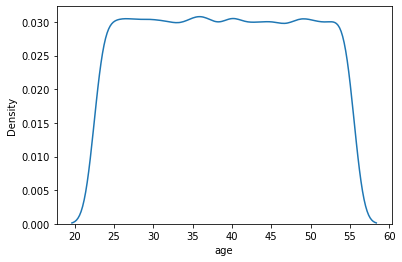

In [349]:
sns.kdeplot(train.age)

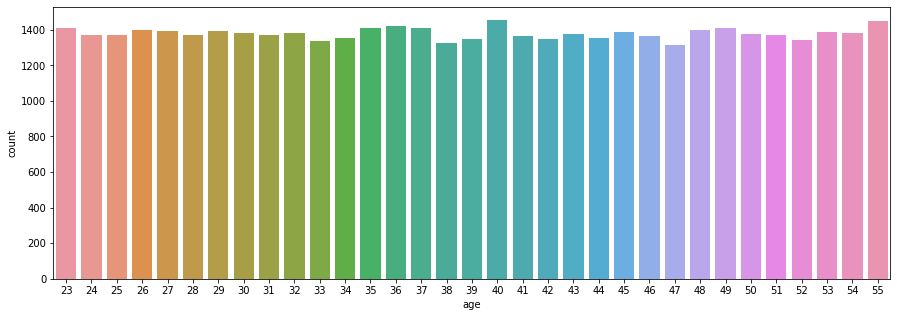

In [350]:
plt.figure(figsize=(15,5))
sns.countplot(x='age', data=train)

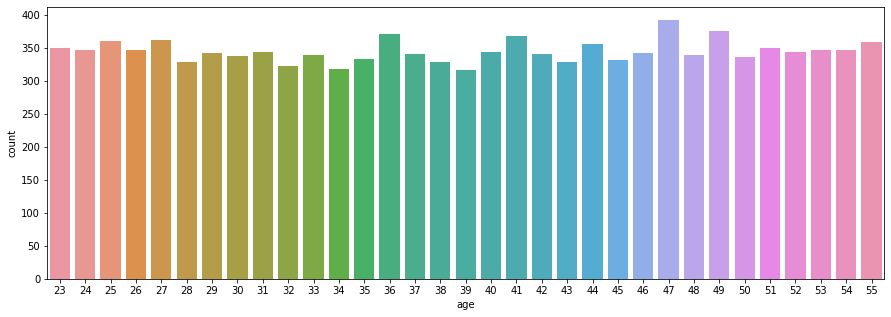

In [351]:
plt.figure(figsize=(15,5))
sns.countplot(x='age', data=test)

Similar distributions and same values of *age* in train and test.

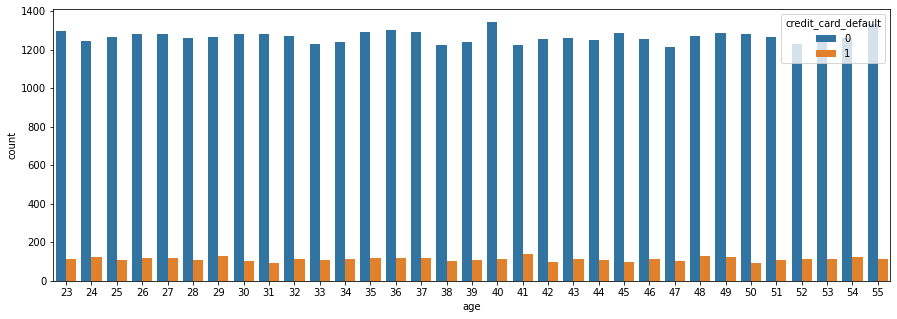

In [352]:
plt.figure(figsize=(15,5))
sns.countplot(x='age', data=train, hue='credit_card_default')

Looks like we have a very even distribution of defaulters for all ages. The *age* column will not be very informative.

In [353]:
train['age'] = train.age.astype('int8')
test['age'] = test.age.astype('int8')

### no_of_children

In [354]:
train.no_of_children.value_counts()

0.0    31241
1.0     8985
2.0     3862
3.0      584
4.0       60
5.0       13
6.0        6
7.0        1
9.0        1
8.0        1
Name: no_of_children, dtype: int64

In [355]:
test.no_of_children.value_counts()

0.0     7825
1.0     2248
2.0      957
3.0      138
4.0       19
5.0        4
11.0       1
7.0        1
Name: no_of_children, dtype: int64

In [356]:
train.no_of_children.isna().sum(), test.no_of_children.isna().sum()

(774, 190)

We will treat the missing values as having no children.

In [357]:
train.no_of_children.fillna(0, inplace=True)
test.no_of_children.fillna(0, inplace=True)

train['no_of_children'] = train.no_of_children.astype('int8')
test['no_of_children'] = test.no_of_children.astype('int8')

### total_family_members

In [358]:
train.total_family_members.nunique(), test.total_family_members.nunique()

(10, 9)

In [359]:
train.total_family_members.value_counts()

2.0     23455
1.0      9913
3.0      7812
4.0      3623
5.0       564
6.0        57
7.0        12
8.0         6
10.0        2
9.0         1
Name: total_family_members, dtype: int64

Looking at the values, *total_family_members* and *no_of_children* look highly correlated.

In [360]:
train[['no_of_children', 'total_family_members']].corr()

,no_of_children,total_family_members
no_of_children,1.000000,0.870833
total_family_members,0.870833,1.000000


In [361]:
test[['no_of_children', 'total_family_members']].corr()

,no_of_children,total_family_members
no_of_children,1.000000,0.870734
total_family_members,0.870734,1.000000


In [362]:
train.total_family_members.isna().sum(), test.total_family_members.isna().sum()

(83, 31)

We will treat missing entries as a single person with no family members.

In [363]:
train.total_family_members.fillna(0, inplace=True)
test.total_family_members.fillna(0, inplace=True)

train['total_family_members'] = train.total_family_members.astype('int8')
test['total_family_members'] = test.total_family_members.astype('int8')

### yearly_debt_payments

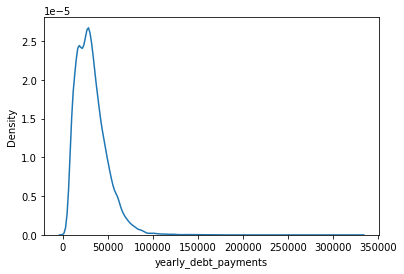

In [364]:
sns.kdeplot(train.yearly_debt_payments)

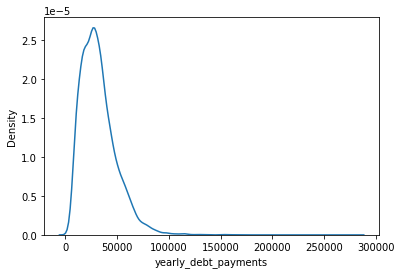

In [365]:
sns.kdeplot(test.yearly_debt_payments)

In [366]:
train.yearly_debt_payments.isna().sum(), test.yearly_debt_payments.isna().sum()

(95, 22)

Values are missing when no payments were made. In such cases we can fill the missing values with 0.

In [367]:
train.yearly_debt_payments.fillna(0, inplace=True)
test.yearly_debt_payments.fillna(0, inplace=True)

### credit_limit, credit_limit_used(%)

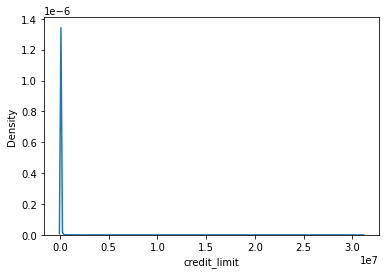

In [368]:
sns.kdeplot(train.credit_limit)

In [369]:
train.loc[train.credit_limit > 1e6]

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
21510,CST_123587,Robin Emmott,32,1,1,0,0,4.193102e+06,1094.0,10,2,0,134852.38,1015611.88,7,906.0,0,0,0
26662,CST_114967,Jonathan Stempel,51,0,0,1,1,1.407590e+08,924.0,8,3,0,32825.60,31129970.49,82,526.0,0,1,1


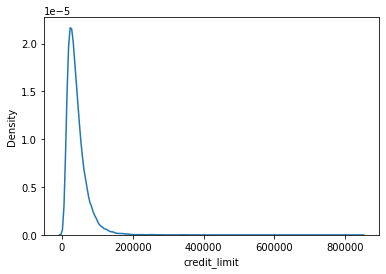

In [370]:
sns.kdeplot(train.drop([21510, 26662]).credit_limit)

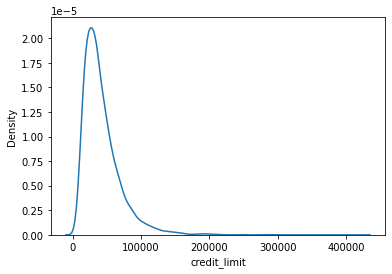

In [371]:
sns.kdeplot(test.credit_limit)

In [372]:
train.credit_limit.isna().sum(), test.credit_limit.isna().sum()

(0, 0)

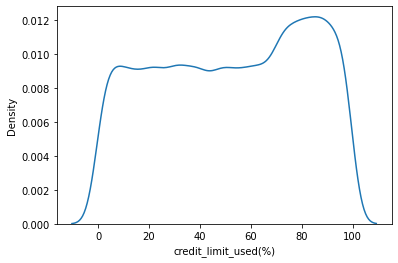

In [373]:
sns.kdeplot(train['credit_limit_used(%)'])

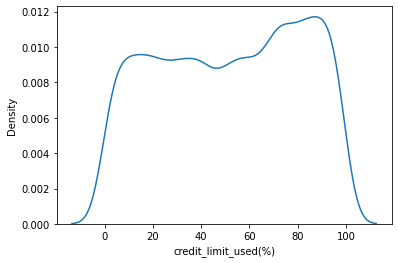

In [374]:
sns.kdeplot(test['credit_limit_used(%)'])

In [375]:
train['credit_limit_used(%)'].isna().sum(), test['credit_limit_used(%)'].isna().sum()

(0, 0)

### credit_score

In [376]:
train.credit_score.isna().sum(), test.credit_score.isna().sum()

(8, 3)

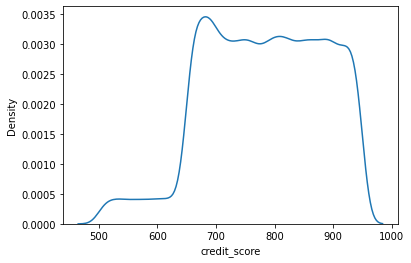

In [377]:
sns.kdeplot(train.credit_score)

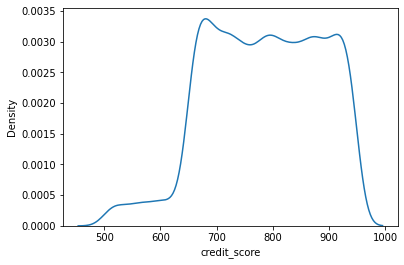

In [378]:
sns.kdeplot(test.credit_score)

Credit score is non-existent if the customer has never taken a loan or used a credit-card before. In such cases, the value will be missing.  
We will fill the missing values with the median *credit_score*.

In [379]:
median_credit_score = train.credit_score.median()
train.credit_score.fillna(median_credit_score, inplace=True)

#filling with same score from train set
test.credit_score.fillna(median_credit_score, inplace=True)

### prev_defaults

In [380]:
train.prev_defaults.isna().sum(), test.prev_defaults.isna().sum()

(0, 0)

In [381]:
train.prev_defaults.value_counts()

0    43060
1     2172
2      296
Name: prev_defaults, dtype: int64

In [382]:
test.prev_defaults.value_counts()

0    10796
1      513
2       74
Name: prev_defaults, dtype: int64

In [383]:
train['prev_defaults'] = train.prev_defaults.astype('int8')
test['prev_defaults'] = test.prev_defaults.astype('int8')

### net_yearly_income

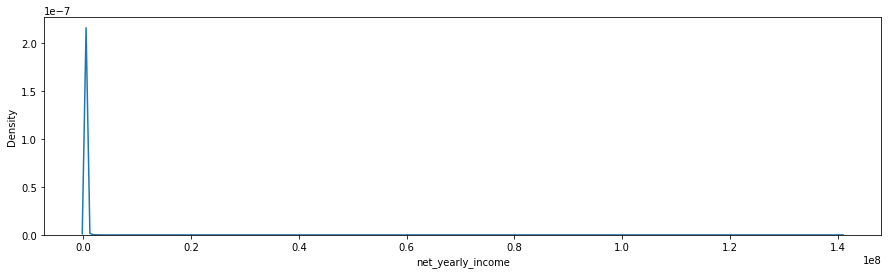

In [384]:
plt.figure(figsize=(15,4))
sns.kdeplot(train.net_yearly_income)

In [385]:
train.net_yearly_income.isna().sum(), test.net_yearly_income.isna().sum()

(0, 0)

Percentage of customers with income > 1M USD:

In [386]:
len(train.loc[train.net_yearly_income > 1e6]) / len(train)

0.001427692848357055

Distribution of incomes below 1M USD:

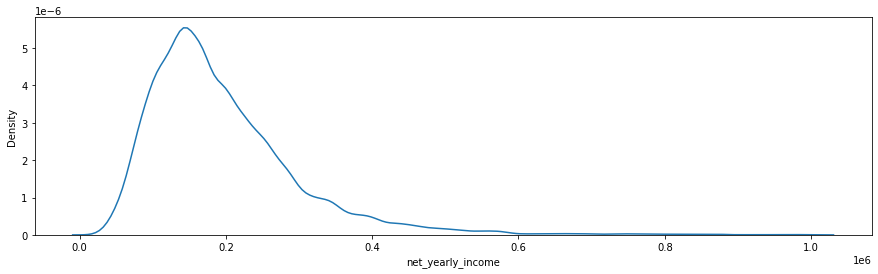

In [387]:
plt.figure(figsize=(15,4))
sns.kdeplot(train.loc[train.net_yearly_income < 1e6].net_yearly_income)

Distribution of incomes below 500K USD:

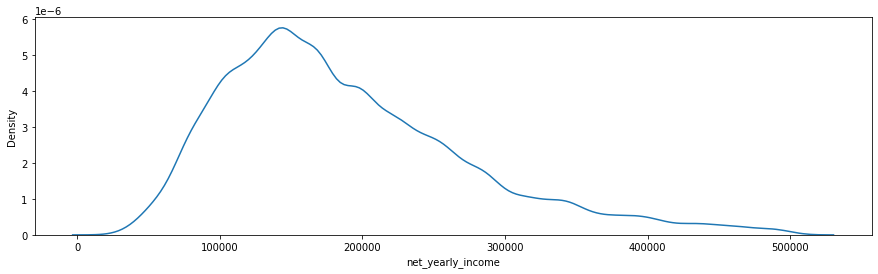

In [388]:
plt.figure(figsize=(15,4))
sns.kdeplot(train.loc[train.net_yearly_income < 0.5e6].net_yearly_income)

### no_of_days_employed

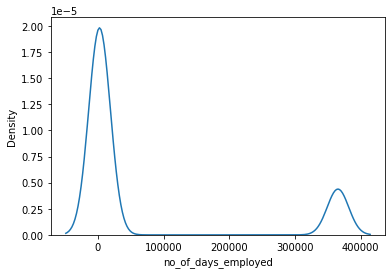

In [389]:
sns.kdeplot(train.no_of_days_employed)

We have values between 300K to 400K for *no_of_days_employed*.
Quite obviously, these are incorrect entries since they are several times that of the average human lifespan.  
Even if a person spends their entire adult life working at the same company, the maximum possible employment duration would be around 45 to 50 years. Let us go with the upper limit i.e., 50 years = 18250 days.

In [390]:
len(train.loc[train.no_of_days_employed > 18250]) / len(train)

0.1778685643999297

17% of values are above the human limit chosen by us.  
We can check their distribution.

In [391]:
train.loc[train.no_of_days_employed > 18250].no_of_days_employed.describe()

count      8098.000000
mean     365245.941097
std           3.721151
min      365240.000000
25%      365243.000000
50%      365246.000000
75%      365249.000000
max      365252.000000
Name: no_of_days_employed, dtype: float64

A minimum of 365240 days -> more than a 1000 years.
Standard deviation of 3.7 days which means these are just incorrect entries centered around the same value.
We can either remove these 8098 rows or replace these values with a dummy value or remove *no_of_days_employed* from the feature set.

### Outliers, missing values, incorrect entries

Columns with outliers: *yearly_debt_payments*, *credit_limit*, *net_yearly_income*

Columns with incorrect entries: *no_of_days_employed*

#### *yearly_debt_payments*

In [392]:
q1 = train.yearly_debt_payments.quantile(0.25)
q3 = train.yearly_debt_payments.quantile(0.75)

iqr = q3 - q1

In [393]:
#rule of thumb for outliers
q1 - 1.5 * iqr, q3 + 1.5 * iqr

(-12917.771249999987, 72607.41874999998)

In [394]:
train.loc[train.yearly_debt_payments > q3 + 1.5 * iqr].yearly_debt_payments.describe()

count      1068.000000
mean      89368.432631
std       23458.641774
min       72619.310000
25%       76478.212500
50%       81862.415000
75%       91963.085000
max      328112.860000
Name: yearly_debt_payments, dtype: float64

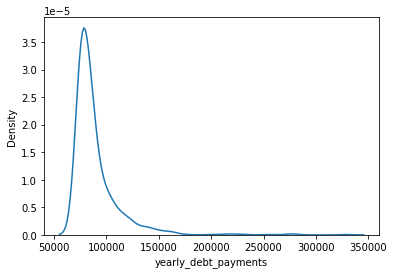

In [395]:
sns.kdeplot(train.loc[train.yearly_debt_payments > q3 + 1.5 * iqr].yearly_debt_payments)

In [396]:
len(train.loc[train.yearly_debt_payments > 1e5])

195

We will remove these 195 rows

In [397]:
train_clipped = train.drop(train[train.yearly_debt_payments > 1e5].index)

#### *credit_limit*

In [398]:
q1 = train_clipped.credit_limit.quantile(0.25)
q3 = train_clipped.credit_limit.quantile(0.75)

iqr = q3 - q1

In [399]:
q1 - 1.5 * iqr, q3 + 1.5 *iqr

(-20053.59, 97227.37)

In [400]:
len(train_clipped.loc[train_clipped.credit_limit > q3 + 1.5 * iqr])

1967

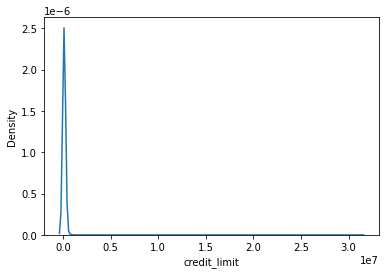

In [401]:
sns.kdeplot(train_clipped.loc[train_clipped.credit_limit > q3 + 1.5 * iqr].credit_limit)

In [402]:
len(train_clipped.loc[train_clipped.credit_limit > 1e5]), len(train_clipped.loc[train_clipped.credit_limit > 1.25e5])

(1792, 783)

In [403]:
len(train_clipped.loc[train_clipped.credit_limit > 1.5e5]), len(train_clipped.loc[train_clipped.credit_limit > 1.75e5])

(365, 199)

In [404]:
len(train_clipped.loc[train_clipped.credit_limit > 2e5]), len(train_clipped.loc[train_clipped.credit_limit > 2.25e5])

(117, 82)

There is a sharp decline in numbers until 150K USD so we will clip the values greater than that.

In [405]:
train_clipped.drop(train_clipped[train_clipped.credit_limit > 1.5e5].index, inplace=True)

#### net_yearly_income

In [406]:
q1 = train_clipped.net_yearly_income.quantile(0.25)
q3 = train_clipped.net_yearly_income.quantile(0.75)

iqr = q3 - q1

In [407]:
q1 - 1.5 * iqr, q3 + 1.5 *iqr

(-41636.598749999976, 404627.93124999997)

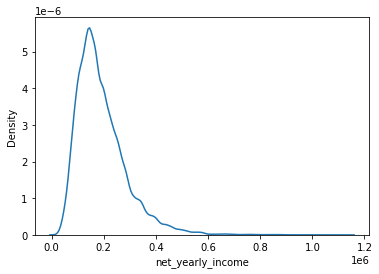

In [408]:
sns.kdeplot(train_clipped.net_yearly_income)

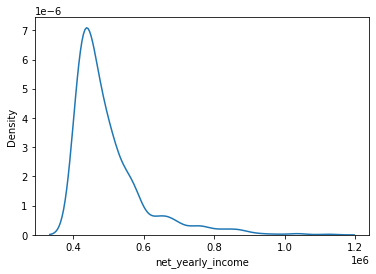

In [409]:
sns.kdeplot(train_clipped.loc[train_clipped.net_yearly_income > q3 + 1.5 * iqr].net_yearly_income)

In [410]:
len(train_clipped.loc[train_clipped.net_yearly_income > q3 + 1.5 * iqr])

1537

In [411]:
len(train_clipped.loc[train_clipped.net_yearly_income > 4.5e5]), len(train_clipped.loc[train_clipped.net_yearly_income > 5e5])

(931, 526)

In [412]:
len(train_clipped.loc[train_clipped.net_yearly_income > 6e5]), len(train_clipped.loc[train_clipped.net_yearly_income > 6.5e5])

(178, 132)

In [413]:
train_clipped.drop(train_clipped[train_clipped.net_yearly_income > 6e5].index, inplace=True)

#### no_of_days_employed

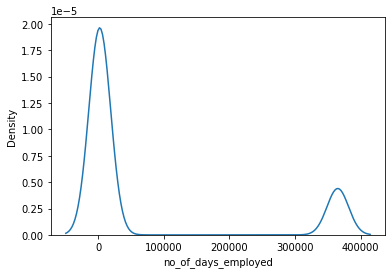

In [414]:
sns.kdeplot(train_clipped.no_of_days_employed)

We have to remove the group of values centered around 365000.  
Other than that, the values are realistic.

In [415]:
train_clipped.drop(train_clipped[train_clipped.no_of_days_employed > 1e5].index, inplace=True)

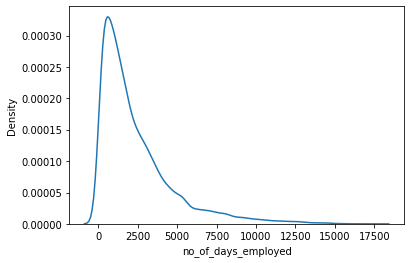

In [416]:
sns.kdeplot(train_clipped.no_of_days_employed)

In [417]:
train_clipped.no_of_days_employed.max()

17538.0

The maximum number below 100K was 17538 days, which is around 48 years.  
An impressive number but very realistic, as we discussed earlier.

Missing values:

In [418]:
train_clipped.no_of_days_employed.isna().sum(), test.no_of_days_employed.isna().sum()

(455, 105)

We will consider missing entries as unemployed i.e., 0 days of employment.

In [419]:
train_clipped.no_of_days_employed.fillna(0, inplace=True)
test.no_of_days_employed.fillna(0, inplace=True)

# Processed dataset

In [420]:
train_clipped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36743 entries, 0 to 45527
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              36743 non-null  object 
 1   name                     36743 non-null  object 
 2   age                      36743 non-null  int8   
 3   gender                   36743 non-null  int8   
 4   owns_car                 36743 non-null  int8   
 5   owns_house               36743 non-null  int8   
 6   no_of_children           36743 non-null  int8   
 7   net_yearly_income        36743 non-null  float64
 8   no_of_days_employed      36743 non-null  float64
 9   occupation_type          36743 non-null  int8   
 10  total_family_members     36743 non-null  int8   
 11  migrant_worker           36743 non-null  int8   
 12  yearly_debt_payments     36743 non-null  float64
 13  credit_limit             36743 non-null  float64
 14  credit_limit_used(%)  

In [421]:
train_clipped.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,ita Bose,46,0,0,1,0,107934.04,612.0,17,1,1,33070.28,18690.93,73,544.0,2,1,1
1,CST_121920,Alper Jonathan,29,1,0,1,0,109862.62,2771.0,8,2,0,15329.53,37745.19,52,857.0,0,0,0
2,CST_109330,Umesh Desai,37,1,0,1,0,230153.17,204.0,8,2,0,48416.60,41598.36,43,650.0,0,0,0
3,CST_128288,Rie,39,0,0,1,0,122325.82,11941.0,3,2,0,22574.36,32627.76,20,754.0,0,0,0
4,CST_151355,McCool,46,1,1,1,0,387286.00,1459.0,3,1,0,38282.95,52950.64,75,927.0,0,0,0


In [422]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11383 entries, 0 to 11382
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              11383 non-null  object 
 1   name                     11383 non-null  object 
 2   age                      11383 non-null  int8   
 3   gender                   11383 non-null  int8   
 4   owns_car                 11383 non-null  int8   
 5   owns_house               11383 non-null  int8   
 6   no_of_children           11383 non-null  int8   
 7   net_yearly_income        11383 non-null  float64
 8   no_of_days_employed      11383 non-null  float64
 9   occupation_type          11383 non-null  int8   
 10  total_family_members     11383 non-null  int8   
 11  migrant_worker           11383 non-null  int8   
 12  yearly_debt_payments     11383 non-null  float64
 13  credit_limit             11383 non-null  float64
 14  credit_limit_used(%)  

In [423]:
test.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months
0,CST_142525,Siva,52,0,1,0,0,232640.53,998.0,17,2,0,14406.73,26524.40,4,779.0,0,0
1,CST_129215,Scott,48,0,0,0,1,284396.79,1338.0,17,3,0,57479.99,68998.72,70,806.0,0,0
2,CST_138443,Victoria,50,0,0,0,1,149419.28,1210.0,17,3,0,21611.01,25187.80,71,528.0,2,0
3,CST_123812,John McCrank,30,0,0,0,1,160437.54,503.0,8,2,1,28990.76,29179.39,9,815.0,0,0
4,CST_144450,Martinne,52,1,0,1,0,233480.37,157.0,8,2,1,54213.72,82331.82,82,613.0,1,1


In [424]:
train_clipped.to_csv('processed_train.csv', index=False)
test.to_csv('processed_test.csv', index=False)